## Trabalho 3: Aprendizado de Máquina
### Modelo de aprendizado supervisionado: Random Forest, Suport Vector Machine, Naive Bayes

Alunos: 

Fernando Rezende Zagatti RA: 11415770

Maiser Jose Alves Oliva RA: 327042

Otavio Cesar Toma da Silva RA: 726576

Theodosio Banevicius RA: 619825

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
dataset = pd.read_csv('winequalityN.csv') #Importando o dataset

In [2]:
dataset.head() #Imprimindo a cabeça do dataset, mostrando que foi importado corretamente

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
dataset.describe()    #Descreve o dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
dataset.isnull().sum()   #Verifica valores faltantes (nulos)

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
transform = {"type": {"white": 1, "red": 2}}    #Transforma as strings da coluna type em números
dataset.replace(transform, inplace=True)
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
dataset.dropna(inplace=True)   #Exclui valores nulos
dataset.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
dataset.info()           #Mostra o que tem em cada coluna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
type                    6463 non-null int64
fixed acidity           6463 non-null float64
volatile acidity        6463 non-null float64
citric acid             6463 non-null float64
residual sugar          6463 non-null float64
chlorides               6463 non-null float64
free sulfur dioxide     6463 non-null float64
total sulfur dioxide    6463 non-null float64
density                 6463 non-null float64
pH                      6463 non-null float64
sulphates               6463 non-null float64
alcohol                 6463 non-null float64
quality                 6463 non-null int64
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


#### Os números mostram um problema de balanceamento de classes, podendo dificultar no aprendizado dos algorotimos. 

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64


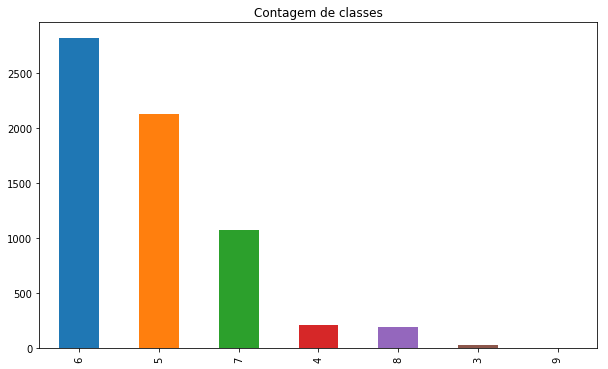

In [8]:
target_count = dataset.quality.value_counts()

target_count.plot(kind='bar', title='Contagem de classes', figsize=(10,6)) #Plotando uma imagem com a contagem de classes

print(target_count) #Contagem das classes com mais detalhes

#### Inicialmente foi aplicado os três algoritmos escolhidos (Random Forest, Support Vector Machine e Naive Bayes) sem utilizar nenhum parâmetro e sem aplicar nenhum pré-processamento nos dados a fim de demonstrar como os algoritmos se comportam naquele dataset. 

Training set has 4524 samples.
Testing set has 1939 samples.
Score do teste: 62.30%


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


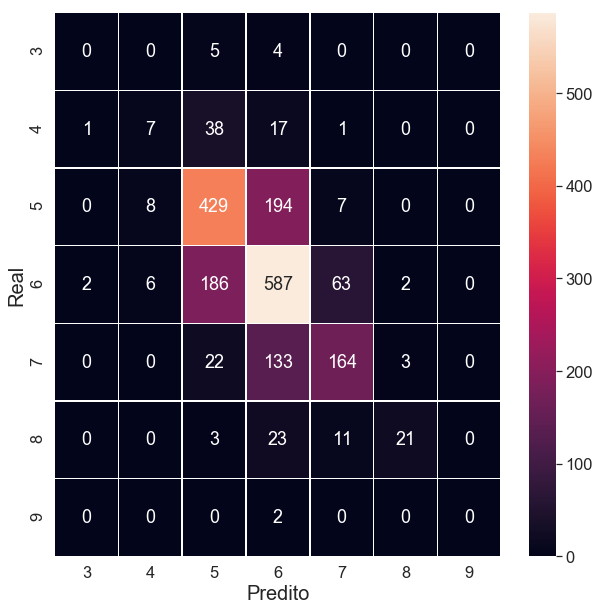

In [9]:
x_t_treino, x_t_teste, y_t_treino, y_t_teste = train_test_split(dataset.drop(['quality'], axis=1), dataset['quality'], test_size=0.3, random_state=42, stratify=dataset['quality'])
print("Training set has {} samples.".format(x_t_treino.shape[0]))  #Quantas amostras são para treinamento
print("Testing set has {} samples.".format(x_t_teste.shape[0]))    #Quantas amostras são para teste

#Random Forest Classifier
model = RandomForestClassifier()
model.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste: {:.2f}%".format(model.score(x_t_teste,y_t_teste.ravel()) * 100))

y = np.array(dataset[['quality']])
x = np.array(dataset.drop(['quality'], axis=1))

#Criando a matriz de confusão.
y_t_pred = model.predict(x_t_teste)

cm = confusion_matrix(y_t_teste, y_t_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, linewidths=.5, linecolor='white', fmt='g')
plt.xlabel('Predito', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.show()

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score do teste: 54.67%


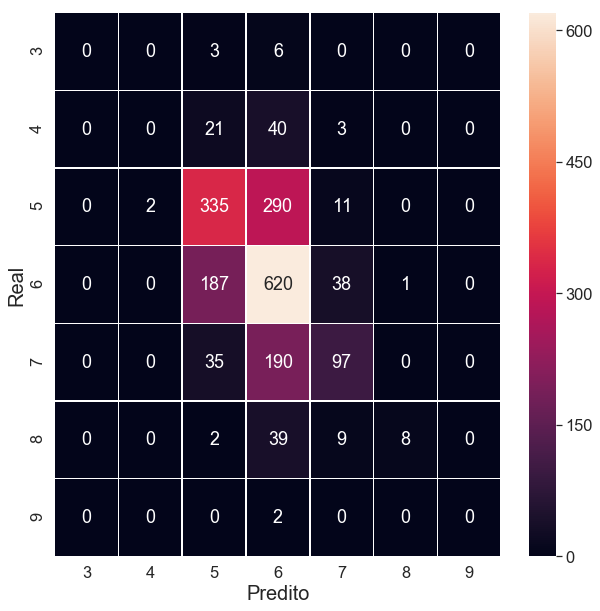

In [10]:
#SVM
model2 = SVC()
model2.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste: {:.2f}%".format(model2.score(x_t_teste,y_t_teste.ravel()) * 100))

#Criando a matriz de confusão.
y_t_pred = model2.predict(x_t_teste)

cm = confusion_matrix(y_t_teste, y_t_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, linewidths=.5, linecolor='white', fmt='g')
plt.xlabel('Predito', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.show()

Score do teste: 42.55%


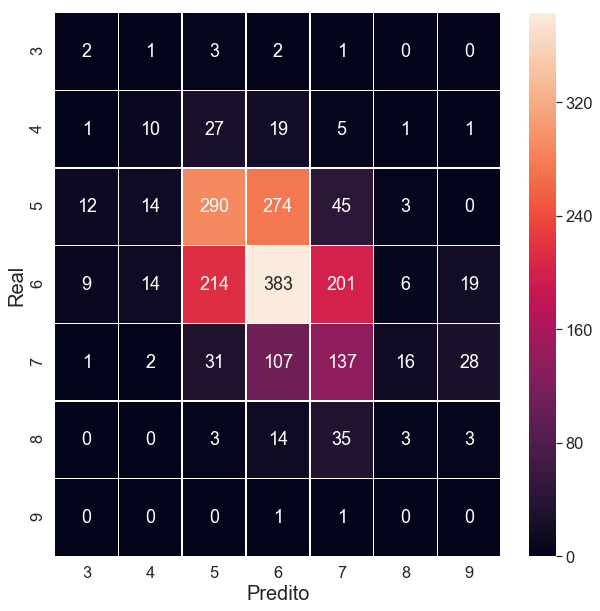

In [11]:
#NB
model3 = GaussianNB()
model3.fit(x_t_treino, y_t_treino.ravel())

#Calculando a predição 
print("Score do teste: {:.2f}%".format(model3.score(x_t_teste,y_t_teste.ravel()) * 100))

#Criando a matriz de confusão.
y_t_pred = model3.predict(x_t_teste)

cm = confusion_matrix(y_t_teste, y_t_pred)

df_cm = pd.DataFrame(cm, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
plt.figure(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(df_cm, annot=True, linewidths=.5, linecolor='white', fmt='g')
plt.xlabel('Predito', fontsize=20)
plt.ylabel('Real', fontsize=20)
plt.show()

#### As matrizes de confusão apontam uma tendência de classificar como 5, 6 ou 7, as classes mais numerosas no banco de dados. Antes de realizar um pré-processamento, vamos observar a relação das três caracteristicas principais, estas definidas pelo Random Forest, com a qualidade do vinho:

Text(0.5, 0, 'Relative Importance')

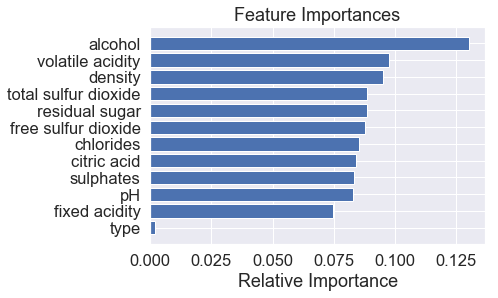

In [12]:

feature = dataset.columns.drop(['quality'])
feature_target = dataset.columns.drop(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'])   #Separando duas variáveis, um
                                                                           #com as colunas e outro com o target
    
importances = model.feature_importances_
indices = np.argsort(importances)       

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature[indices])
plt.xlabel('Relative Importance')

C:\Users\Fernando\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'quality vs density')

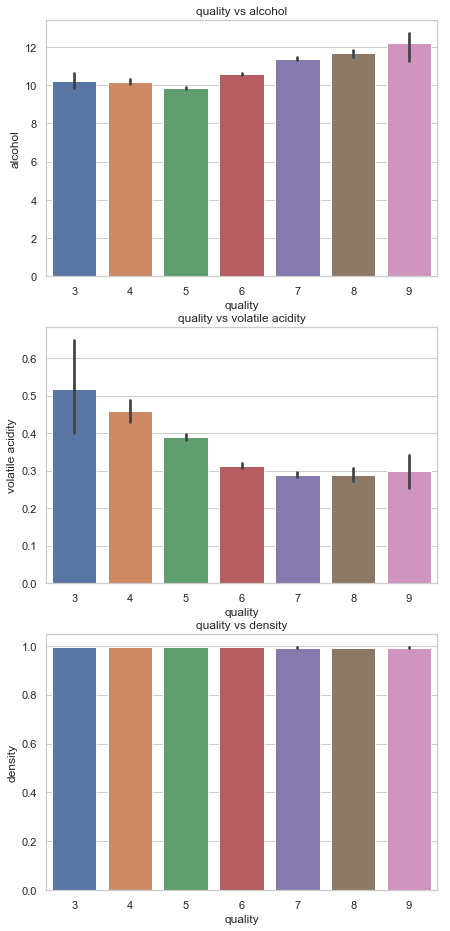

In [13]:
sns.set()
sns.set_style("whitegrid")
fig, axs = plt.subplots(3, 1, figsize = (7,16))
sns.barplot(x='quality', y='alcohol', data=dataset[['quality', 'alcohol']], ax=axs[0])
sns.barplot(x='quality', y='volatile acidity', data=dataset[['quality', 'volatile acidity']], ax=axs[1])
sns.barplot(x='quality', y='density', data=dataset[['quality', 'density']], ax=axs[2])

axs[0].set_ylabel("alcohol")
axs[1].set_ylabel("volatile acidity")
axs[2].set_ylabel("density")

axs[0].set_xlabel("quality")
axs[1].set_xlabel("quality")
axs[2].set_xlabel("quality")

axs[0].set_title("quality vs alcohol")
axs[1].set_title("quality vs volatile acidity")
axs[2].set_title("quality vs density")

#### Foi possível observar uma tendência quanto ao álcool e a volatilidade do vinho. Quanto maior o álcool e menor a volatilidade, maior a qualidade. Estudando essas caracteristicas juntamente com especialistas, talvez seja possível tirar conclusões mais profundas para a classificação de vinhos. 
#### Em seguida transformamos o problema em um problema binário, sendo as qualidades de 0 a 5 sendo "Baixa" e de 6 a 10 como "Alta".

In [14]:
transform = {"quality": {3: "Baixa", 4: "Baixa", 5: "Baixa", 6: "Alta", 7: "Alta", 8: "Alta", 9: "Alta"}}    #Transforma as strings da coluna type em números
dataset.replace(transform, inplace=True)
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Alta
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Alta
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Alta
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Alta
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Alta


Classe Alta: 4091
Classe Baixa: 2372
Proporção: 1.72 : 1


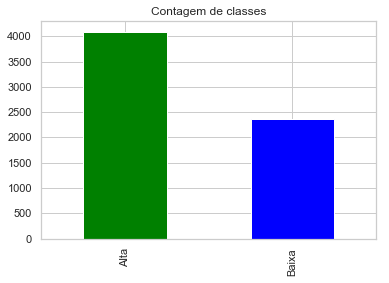

In [15]:
target_count = dataset.quality.value_counts()
print('Classe Alta:', target_count[0])
print('Classe Baixa:', target_count[1])
print('Proporção:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Contagem de classes', color={'green', 'blue'});

In [16]:
x_t_treino, x_t_teste, y_t_treino, y_t_teste = train_test_split(dataset.drop(['quality'], axis=1), dataset['quality'], test_size=0.3, random_state=42, stratify=dataset['quality'])
print("Training set has {} samples.".format(x_t_treino.shape[0]))
print("Testing set has {} samples.".format(x_t_teste.shape[0]))

Training set has 4524 samples.
Testing set has 1939 samples.


#### Utilizando o GridSearch, procuramos os melhores resultados ao utilizarmos determinados parâmetros.

In [17]:
#Random Forest Classifier
parameters = {'n_estimators': (100, 300, 1000), 'max_depth': (20, 50, 100)}

        
model = RandomForestClassifier(random_state=42)
clf = GridSearchCV(model, parameters)
clf.fit(x_t_treino, y_t_treino.ravel())


#Calculando a predição 
print(clf.best_params_)
print("Score do teste: {:.2f}%".format(clf.score(x_t_teste,y_t_teste.ravel()) * 100))

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 50, 'n_estimators': 300}
Score do teste: 82.36%


In [18]:
#Suport Vector Machine
parameters = {'gamma':(0.01, 0.1, 1), 'C':(0.01, 0.1, 1, 10)}


model2 = SVC(random_state=42, kernel='rbf')
clf2 = GridSearchCV(model2, parameters) 
clf2.fit(x_t_treino, y_t_treino.ravel())


#Calculando a predição 
print(clf2.best_params_)
print("Score do teste: {:.2f}%".format(clf2.score(x_t_teste,y_t_teste.ravel()) * 100))

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'gamma': 0.01}
Score do teste: 74.83%


#### Aplicamos o treinamento com os melhores resultados encontrados para os algoritmos. Como método avaliativo utilizamos a acurácia, F1-Score e curva ROC. Foi adicionado o tempo de processamento para fins de curiosidade. 

In [19]:
#Random Forest Classifier com os melhores parâmetros
comeco = time.time()       
model = RandomForestClassifier(n_estimators = 300, max_depth = 20, random_state=42, verbose=3)
treino = model.fit(x_t_treino, y_t_treino.ravel())
fim = time.time()

y_score_RF = model.predict_proba(x_t_teste)

tempoRF = fim - comeco
tempoRF = round(tempoRF, 2)
print("Tempo de processamento:", tempoRF, "s")

scoreRF = model.score(x_t_teste,y_t_teste.ravel())
scoreRF = scoreRF * 100
scoreRF = round(scoreRF, 2)
print("Score do teste:", scoreRF, "%")

pred_teste = treino.predict(x_t_teste)
scoreRFF1 = fbeta_score(y_t_teste.ravel(), pred_teste, beta=1, average='micro')
scoreRFF1 = scoreRFF1 * 100
scoreRFF1 = round(scoreRFF1, 2)
print("F1-Score:", scoreRF, "%")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    3.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Tempo de processamento: 4.02 s


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Score do teste: 82.36 %
F1-Score: 82.36 %


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


In [20]:
#Suport Vector Machine
comeco = time.time()
model2 = SVC(gamma = 0.01, C = 10, random_state=42, verbose=2, kernel='rbf', probability=1)
treino = model2.fit(x_t_treino, y_t_treino.ravel())
fim = time.time()

y_score_SVM = model2.predict_proba(x_t_teste)

tempoSVM = fim - comeco
tempoSVM = round(tempoSVM, 2)
print("Tempo de processamento:", tempoSVM, "s")

scoreSVM = model2.score(x_t_teste,y_t_teste.ravel())
scoreSVM = scoreSVM * 100
scoreSVM = round(scoreSVM, 2)
print("Score do teste:", scoreSVM, "%")

pred_teste = treino.predict(x_t_teste)
scoreSVMF1 = fbeta_score(y_t_teste.ravel(), pred_teste, beta=1, average='micro')
scoreSVMF1 = scoreSVMF1 * 100
scoreSVMF1 = round(scoreSVMF1, 2)
print("F1-Score:", scoreSVMF1, "%")

[LibSVM]Tempo de processamento: 8.05 s
Score do teste: 74.83 %
F1-Score: 74.83 %


In [21]:
#Naive Bayes
comeco = time.time()
model3 = GaussianNB()
treino = model3.fit(x_t_treino, y_t_treino.ravel())
fim = time.time()

y_score_NB = model3.predict_proba(x_t_teste)

tempoNB = fim - comeco
tempoNB = round(tempoNB, 2)
print("Tempo de processamento:", tempoNB, "s")

scoreNB = model3.score(x_t_teste,y_t_teste.ravel())
scoreNB = scoreNB * 100
scoreNB = round(scoreNB, 2)
print("Score do teste:", scoreNB, "%")

pred_teste = treino.predict(x_t_teste)
scoreNBF1 = fbeta_score(y_t_teste.ravel(), pred_teste, beta=1, average='micro')
scoreNBF1 = scoreNBF1 * 100
scoreNBF1 = round(scoreNBF1, 2)
print("F1-Score:", scoreNBF1, "%")

Tempo de processamento: 0.02 s
Score do teste: 67.35 %
F1-Score: 67.35 %


In [22]:
resultados = {'tempo': [tempoNB, tempoSVM, tempoRF], 'score': [scoreNB, scoreSVM, scoreRF], 'f1-score': [scoreNBF1, scoreSVMF1, scoreRFF1]}
print(resultados)

{'tempo': [0.02, 8.05, 4.02], 'score': [67.35, 74.83, 82.36], 'f1-score': [67.35, 74.83, 82.36]}


#### Abaixo plotamos um gráfico para melhor visualização dos resultados.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.2s finished


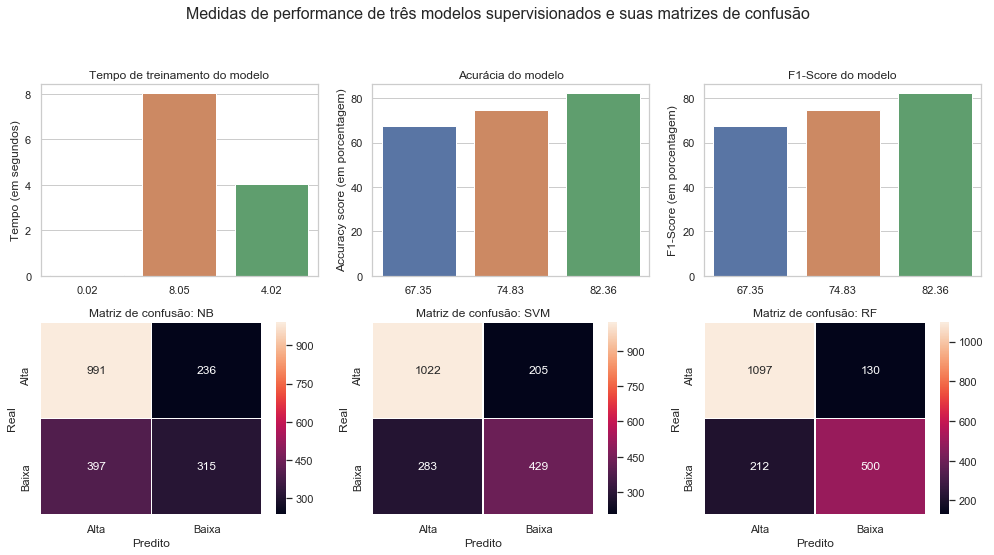

<Figure size 432x288 with 0 Axes>

In [23]:
sns.set()
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 3, figsize = (14,7))
sns.barplot(x='score', y='tempo', data=resultados, ax=axs[0,0])
sns.barplot(x='score', y='score', data=resultados, ax=axs[0,1])
sns.barplot(x='score', y='f1-score', data=resultados, ax=axs[0,2])
axs[0,0].set_xticklabels(resultados['tempo'])
axs[0,1].set_xticklabels(resultados['score'])
axs[0,2].set_xticklabels(resultados['f1-score'])

axs[0,0].set_ylabel("Tempo (em segundos)")
axs[0,1].set_ylabel("Accuracy score (em porcentagem)")
axs[0,2].set_ylabel("F1-Score (em porcentagem)")

axs[0,0].set_title("Tempo de treinamento do modelo")
axs[0,1].set_title("Acurácia do modelo")
axs[0,2].set_title("F1-Score do modelo")

#Gráficos de baixo

y = np.array(dataset[['quality']])
x = np.array(dataset.drop(['quality'], axis=1))

predRF = model.predict(x_t_teste)
predSVM = model2.predict(x_t_teste)
predNB = model3.predict(x_t_teste)

cmRF = confusion_matrix(y_t_teste, predRF)
cmSVM = confusion_matrix(y_t_teste, predSVM)
cmNB = confusion_matrix(y_t_teste, predNB)

df_cmRF = pd.DataFrame(cmRF, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
df_cmSVM = pd.DataFrame(cmSVM, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
df_cmNB = pd.DataFrame(cmNB, index = [i for i in np.unique(y)],
                        columns = [i for i in np.unique(y)])
sns.heatmap(df_cmNB, annot=True, linewidths=.5, linecolor='white', fmt='g', ax=axs[1,0])
sns.heatmap(df_cmSVM, annot=True, linewidths=.5, linecolor='white', fmt='g', ax=axs[1,1])
sns.heatmap(df_cmRF, annot=True, linewidths=.5, linecolor='white', fmt='g', ax=axs[1,2])

axs[1,0].set_ylabel("Real")
axs[1,1].set_ylabel("Real")
axs[1,2].set_ylabel("Real")

axs[1,0].set_xlabel("Predito")
axs[1,1].set_xlabel("Predito")
axs[1,2].set_xlabel("Predito")

axs[1,0].set_title("Matriz de confusão: NB")
axs[1,1].set_title("Matriz de confusão: SVM")
axs[1,2].set_title("Matriz de confusão: RF")

plt.suptitle("Medidas de performance de três modelos supervisionados e suas matrizes de confusão", fontsize = 16, y = 1.10)
plt.tight_layout()
plt.show()
plt.gcf().clear()

#### Finalmente plotamos as curvas ROC com suas respectivas áreas calculadas e observamos que o classificador Random Forest tem uma taxa de acerto melhor do que o SVM e Naive Bayes.

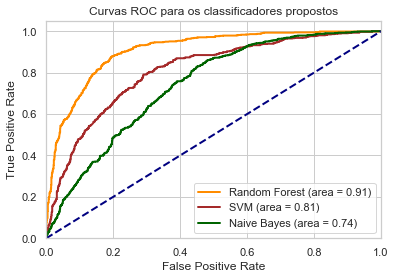

In [24]:
probsRF = y_score_RF[:, 1]
probsSVM = y_score_SVM[:,1]
probsNB = y_score_NB[:,1]

# calculando AUC RandomForest
aucRF = roc_auc_score(y_t_teste, probsRF)
# calculando AUC para SVM
aucSVM = roc_auc_score(y_t_teste, probsSVM)
# calculando AUC Naive Bayes
aucNB = roc_auc_score(y_t_teste, probsNB)

fprRF, tprRF, thresholdsRF = roc_curve(y_t_teste, probsRF, pos_label='Baixa')
fprSVM, tprSVM, thresholdsSVM = roc_curve(y_t_teste, probsSVM, pos_label='Baixa')
fprNB, tprNB, thresholdsNB = roc_curve(y_t_teste, probsNB, pos_label='Baixa')

plt.figure()

plt.plot(fprRF, tprRF, color='darkorange',
         lw=2, label='Random Forest (area = %0.2f)' % aucRF)
plt.plot(fprSVM, tprSVM, color='brown',
         lw=2, label='SVM (area = %0.2f)' % aucSVM)
plt.plot(fprNB, tprNB, color='darkgreen',
         lw=2, label='Naive Bayes (area = %0.2f)' % aucNB)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para os classificadores propostos')
plt.legend(loc="lower right")
plt.show()